In [1]:
# Create deep neural network in order to predict stocks
# NN will be deployed in Google AI Platform for use in Stock Terminal program

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

apple_data = pd.read_csv('/Users/jasonmoreau/Desktop/Stock Prediction/AAPL.csv', delimiter = ',')

In [4]:
# View data
print(apple_data)

            Date        Open        High         Low       Close   Adj Close  \
0     2015-12-21   26.820000   26.842501   26.392500   26.832500   24.859543   
1     2015-12-22   26.850000   26.930000   26.612499   26.807501   24.836382   
2     2015-12-23   26.817499   27.212500   26.799999   27.152500   25.156017   
3     2015-12-24   27.250000   27.250000   26.987499   27.007500   25.021677   
4     2015-12-28   26.897499   26.922501   26.545000   26.705000   24.741419   
...          ...         ...         ...         ...         ...         ...   
1254  2020-12-14  122.599998  123.349998  121.540001  121.779999  121.779999   
1255  2020-12-15  124.339996  127.900002  124.129997  127.879997  127.879997   
1256  2020-12-16  127.410004  128.369995  126.559998  127.809998  127.809998   
1257  2020-12-17  128.899994  129.580002  128.039993  128.699997  128.699997   
1258  2020-12-18  128.960007  129.100006  126.120003  126.660004  126.660004   

         Volume  
0     190362400  
1  

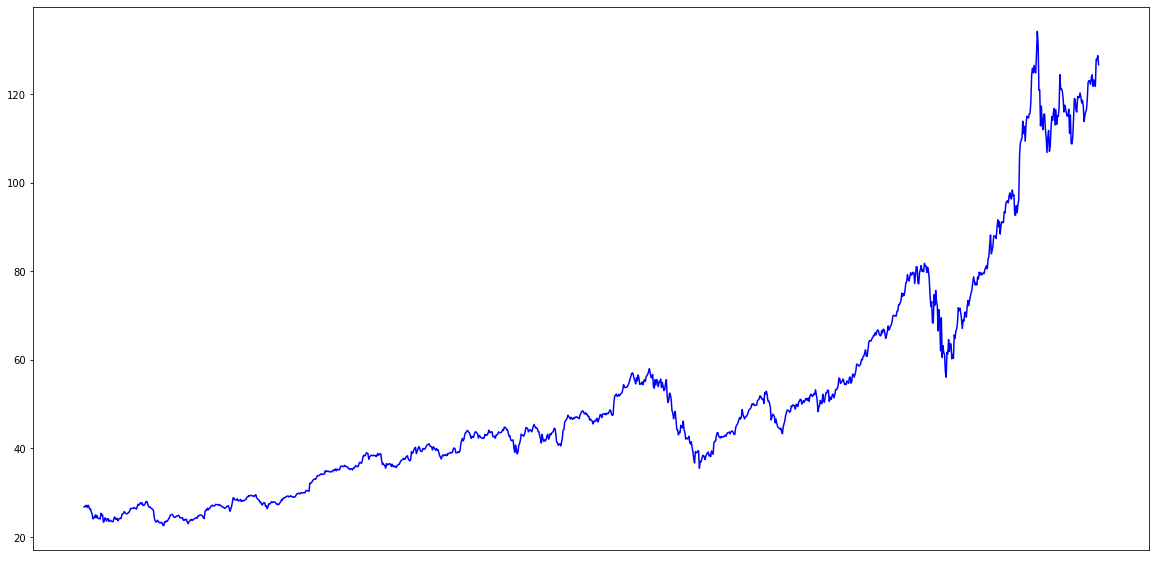

In [221]:
# Apple (AAPL) 5-Year stock chart --> line graph w/ years include
plt.figure(figsize=(20,10))
plt.xticks([])  # Remove ticks from x-axis
#plt.xticks(step=0.5, rotation=20)
plt.plot(apple_data['Date'], apple_data['Close'], color = 'b')

In [ ]:
# Create list of column names so that we can refer back to each column once converted to a numpy array
columns = ['Date'. 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [240]:
# Split into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(apple_data, test_size = 0.20)

In [241]:
# View dates
df_apple = pd.DataFrame(apple_data)
df_apple['Date']

0       2015-12-21
1       2015-12-22
2       2015-12-23
3       2015-12-24
4       2015-12-28
           ...    
1254    2020-12-14
1255    2020-12-15
1256    2020-12-16
1257    2020-12-17
1258    2020-12-18
Name: Date, Length: 1259, dtype: object

In [243]:
# Data Preprocessing 
# Remove year from dates so that we can only concentrate on the month and day in observations
# I might have to change this back (w/ years included) if training doesn't go well
def transform_year(data):
    data = np.array(data)   # Convert to numpy array
    for i in data:        
        year_split = i[0].split('-')
        i[0] = month_day = year_split[1] + year_split[2]
    return data

X_train = transform_year(X_train)
X_test = transform_year(X_test)

In [244]:
# Convert data from object to float
def convert_to_float(data):
    data = data.astype(np.float64)
    return data

X_train = convert_to_float(X_train)
X_test = convert_to_float(X_test)

In [245]:
# View converted data as a data frame
frame = pd.DataFrame(X_train)

In [246]:
# Display data
frame

,0,1,2,3,4,5,6
0,629.0,36.177502,36.282501,35.570000,35.919998,34.307800,125997600.0
1,806.0,49.077499,49.517502,48.509998,49.250000,48.497894,143299200.0
2,1113.0,65.282501,66.195000,65.267502,66.117500,65.551399,102734400.0
3,731.0,102.885002,106.415001,100.824997,106.260002,105.886086,374336800.0
4,713.0,24.352501,24.417500,24.209999,24.217501,22.695921,103568800.0
...,...,...,...,...,...,...,...
1002,805.0,109.377502,110.392502,108.897499,110.062500,109.675194,121992000.0
1003,623.0,23.985001,24.072500,23.812500,24.025000,22.515512,128960800.0
1004,1220.0,40.099998,40.527500,38.825001,39.207500,38.296394,259092000.0
1005,908.0,26.812500,26.817499,26.309999,26.379999,24.856476,212008000.0


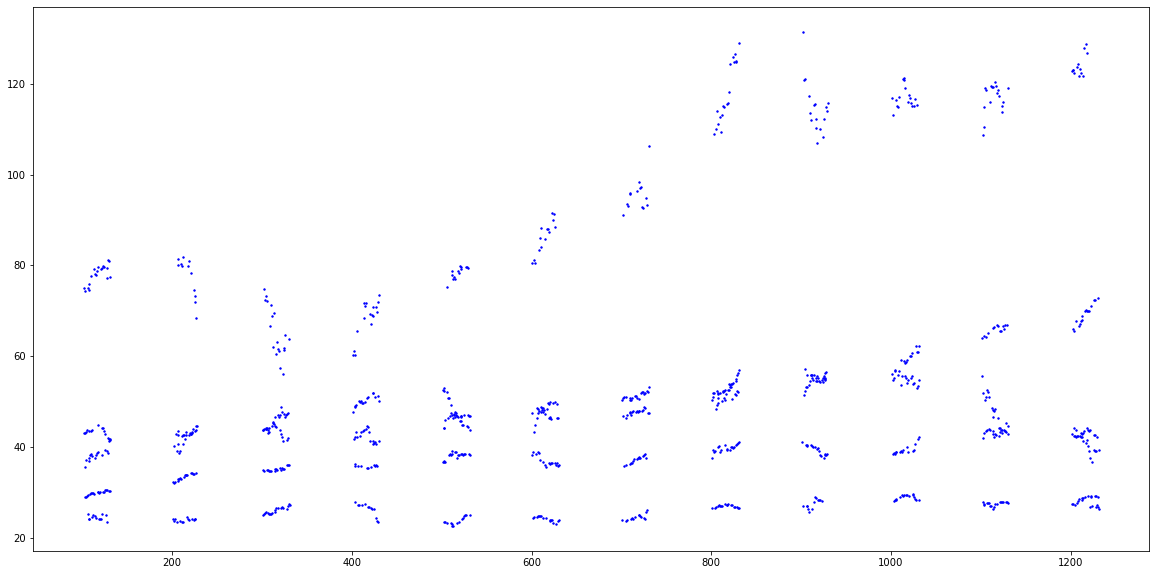

In [247]:
# Apple (AAPL) 5-Year stock chart --> scatter plot w/o years
plt.figure(figsize=(20,10))
plt.scatter(frame[0], frame[4], color = 'b', s = 2)

In [284]:
# Normalize training and test data
from sklearn.preprocessing import Normalizer

def normalize_data(data_train, data_test):
    normalize = Normalizer()
    data_train = normalize.fit_transform(data_train)
    data_test = normalize.fit_transform(data_test)
    return data_train, data_test

X_train, X_test = normalize_data(X_train, X_test)

In [285]:
# Function to scale train and test data
# Will use later
from sklearn.preprocessing import StandardScaler

def scale_data(data_train, data_test):
    scaled = StandardScaler()
    data_test = scaled.fit_transform(data_train)
    data_train = scaled.fit_transform(data_test)
    return data_train, data_test

In [286]:
# Convert scaled training data to data frame for viewing
df_data = pd.DataFrame(X_train_fitted)

In [287]:
# Print data frame
df_data

,0,1,2,3,4,5,6
0,-0.129470,-0.590113,-0.598785,-0.603522,-0.602108,-0.608792,-0.132198
1,0.384611,-0.085435,-0.088829,-0.088321,-0.080651,-0.063689,0.143043
2,1.276265,0.548542,0.553771,0.578872,0.579190,0.591411,-0.502279
3,0.166780,2.019639,2.103485,1.994578,2.149528,2.140844,3.818490
4,0.114501,-1.052734,-1.055955,-1.055815,-1.059899,-1.054856,-0.489005
...,...,...,...,...,...,...,...
1002,0.381706,2.273640,2.256742,2.315982,2.298278,2.286400,-0.195921
1003,-0.146896,-1.067112,-1.069248,-1.071641,-1.067429,-1.061786,-0.085058
1004,1.587037,-0.436656,-0.435222,-0.473925,-0.473504,-0.455573,1.985125
1005,0.680861,-0.956494,-0.963481,-0.972205,-0.975304,-0.971859,1.236093


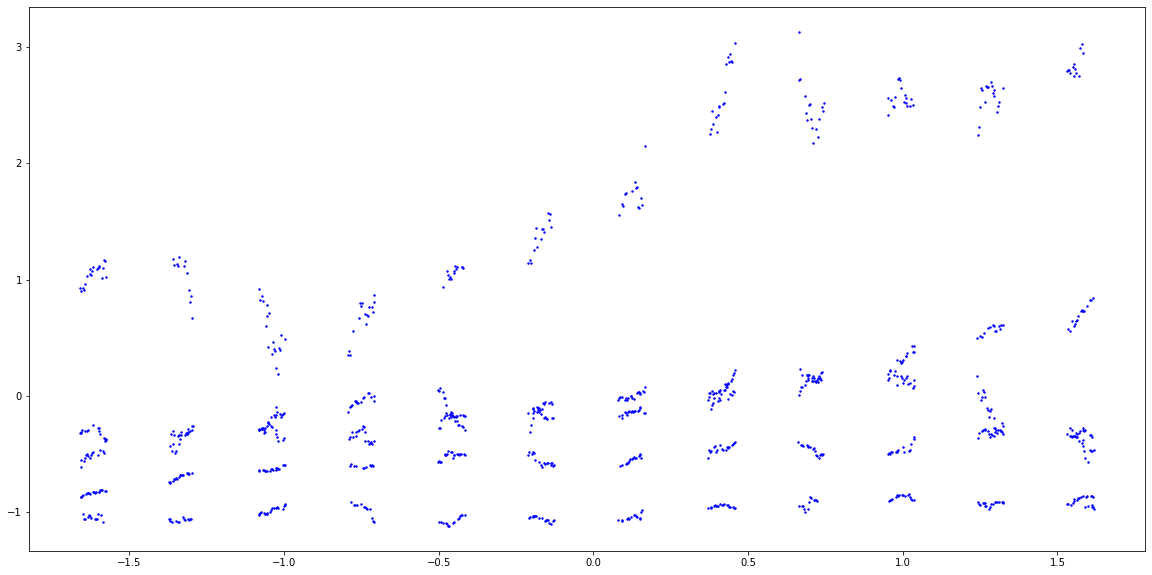

In [288]:
# Visualize scaled training data
plt.figure(figsize=(20,10))
plt.scatter(df_data[0], df_data[4], c = 'b', s = 2)